In [171]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [172]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


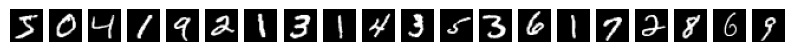

In [173]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [174]:

print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


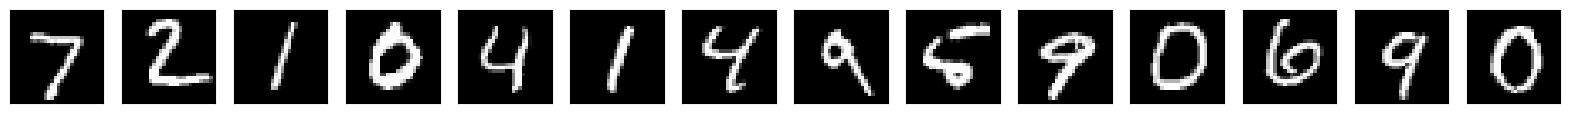

In [175]:
n=14
plt.figure(figsize=(20,4))
for i in range(n):
    ax= plt.subplot(2, n, i+1) 
    plt.imshow(X_test[i].reshape(28,28))

    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

plt.close()
     

In [176]:
x_train= X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)

In [177]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype('float32')/255.0

In [178]:

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [179]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [180]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [181]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [182]:
history = model.fit(X_train, y_train,  epochs=10, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/10
1500/1500 - 18s - 12ms/step - accuracy: 0.8617 - loss: 2.0657 - val_accuracy: 0.9075 - val_loss: 0.4679
Epoch 2/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9286 - loss: 0.3338 - val_accuracy: 0.9379 - val_loss: 0.2588
Epoch 3/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9441 - loss: 0.2155 - val_accuracy: 0.9217 - val_loss: 0.3088
Epoch 4/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9537 - loss: 0.1681 - val_accuracy: 0.9501 - val_loss: 0.1985
Epoch 5/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9578 - loss: 0.1534 - val_accuracy: 0.9485 - val_loss: 0.2075
Epoch 6/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9622 - loss: 0.1331 - val_accuracy: 0.9563 - val_loss: 0.1737
Epoch 7/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9672 - loss: 0.1171 - val_accuracy: 0.9522 - val_loss: 0.1986
Epoch 8/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9699 - loss: 0.1063 - val_accuracy: 0.9594 - val_loss: 0.1675
Epoch 9/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9705 - loss: 0.1033 - val_accuracy: 0.9606

In [183]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
loss_value = test_loss
accuracy_value = test_accuracy

print(f'Test Loss: ', loss_value)
print(f'Test Accuracy: ', accuracy_value)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9585 - loss: 0.1725
Test Loss:  0.1450250744819641
Test Accuracy:  0.9639999866485596


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted digit: 7


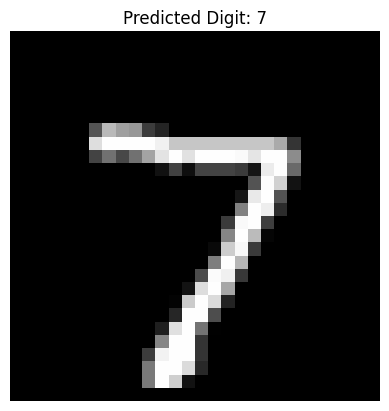

In [184]:
predicted = model.predict(np.expand_dims(X_test[0], axis=0))

pr = np.argmax(predicted)
print("Predicted digit:", pr)

plt.imshow(X_test[0].reshape(28, 28), cmap='gray')  
plt.title(f"Predicted Digit: {pr}")
plt.axis('off') 
plt.show()
